# U.S. Medical Insurance Costs

Project goal

(1) Calculate the average cost of insurance for each factor
(age, sex, bmi, children, smoker, region)

(2) Create an equation that let us predict the cost of insurance after entering each factor

(3) Calcuate the error of margin for the equation by comparing the predicted cost to the actual cost

(4) Create an Orginal risk score






In [122]:
import csv

csv_list = []
with open ('insurance.csv') as csv_file:
    read_csv = csv.DictReader(csv_file)
    for i in read_csv:
        csv_list.append(i)

print(csv_list)

[{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}, {'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}, {'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462'}, {'age': '33', 'sex': 'male', 'bmi': '22.705', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '21984.47061'}, {'age': '32', 'sex': 'male', 'bmi': '28.88', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '3866.8552'}, {'age': '31', 'sex': 'female', 'bmi': '25.74', 'children': '0', 'smoker': 'no', 'region': 'southeast', 'charges': '3756.6216'}, {'age': '46', 'sex': 'female', 'bmi': '33.44', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '8240.5896'}, {'age': '37', 'sex': 'female', 'bmi': '27.74', 'children': '3', 'smoker': 'no', 'region': 'northwest', 'charges'

Allows me to look at each table individually.


In [123]:
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []

for i in csv_list:
    age.append(int(i['age']))
    sex.append(i['sex'])
    bmi.append(i['bmi'])
    children.append(i['children'])
    smoker.append(i['smoker'])
    region.append(i['region'])
    charges.append(float(i['charges']))

print(charges)



[16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552, 3756.6216, 8240.5896, 7281.5056, 6406.4107, 28923.13692, 2721.3208, 27808.7251, 1826.843, 11090.7178, 39611.7577, 1837.237, 10797.3362, 2395.17155, 10602.385, 36837.467, 13228.84695, 4149.736, 1137.011, 37701.8768, 6203.90175, 14001.1338, 14451.83515, 12268.63225, 2775.19215, 38711.0, 35585.576, 2198.18985, 4687.797, 13770.0979, 51194.55914, 1625.43375, 15612.19335, 2302.3, 39774.2763, 48173.361, 3046.062, 4949.7587, 6272.4772, 6313.759, 6079.6715, 20630.28351, 3393.35635, 3556.9223, 12629.8967, 38709.176, 2211.13075, 3579.8287, 23568.272, 37742.5757, 8059.6791, 47496.49445, 13607.36875, 34303.1672, 23244.7902, 5989.52365, 8606.2174, 4504.6624, 30166.61817, 4133.64165, 14711.7438, 1743.214, 14235.072, 6389.37785, 5920.1041, 17663.1442, 16577.7795, 6799.458, 11741.726, 11946.6259, 7726.854, 11356.6609, 3947.4131, 1532.4697, 2755.02095, 6571.02435, 4441.21315, 7935.29115, 37165.1638, 11033.6617, 39836.519, 21098.55405, 43578.9394, 

(1) Calculate the average cost of insurance for each table, changing each result to a float object



In [124]:


def age_effect():


    ages60s , ages50s, ages40s, ages30s, ages20s = [], [], [], [], [] #age groups
    
    #get age groups
    for i in csv_list:

        
        age = float(i['age'])
        charges = float(i['charges'])

        if age >= 60:
            ages60s.append(charges)
        elif age >= 50:
            ages50s.append(charges)
        elif age >= 40:
            ages40s.append(charges)
        elif age >= 30:
            ages30s.append(charges)
        else:
            ages20s.append(charges)

    
        
    return(sum(ages60s)/len(ages60s),sum(ages50s)/len(ages50s),sum(ages40s)/len(ages40s),sum(ages30s)/len(ages30s),sum(ages20s)/len(ages20s))

ages60s,ages50s,ages40s,ages30s,ages20s = age_effect()

def sex_effect():
    male, female = [] , []

    for i in csv_list: 
        if i['sex'] == 'male':
            male.append(float(i['charges']))
        else:
            female.append(float(i['charges']))

    return(sum(male)/len(male), sum(female)/len(female))

male_avg, female_avg = sex_effect()   

def bmi_effect():

    under_weight, healthy, overweight, obese = [], [], [], []
    for i in csv_list:
        bmi = float(i['bmi'])
        charges = float(i['charges'])
        if bmi >= 30:
            obese.append(charges)
        elif float(bmi) >= 25:
            overweight.append(charges)
        elif float(bmi) >= 18.5:
            healthy.append(charges)
        else:
            under_weight.append(charges)

    return(sum(under_weight)/len(under_weight),sum(healthy)/len(healthy),sum(overweight)/len(overweight),sum(obese)/len(obese))

under_weight, healthy, overweight, obese = bmi_effect()

def children_effect():
    zero,one,two,three,four,five = [],[],[],[],[],[]
    
    for i in csv_list:
        child = float(i['children'])
        charges = float(i['charges'])
    
        if child == 5:
            five.append(charges)
        elif child == 4:
            four.append(charges)
        elif child == 3:
            three.append(charges)
        elif child == 2:
            two.append(charges)
        elif child == 1:
            one.append(charges)
        else:
            zero.append(charges)

    return(sum(zero)/len(zero),sum(one)/len(one),sum(two)/len(two),sum(three)/len(three),sum(four)/len(four),sum(five)/len(five))

zero,one,two,three,four,five = children_effect()

def smoker_effect():
    smoker, non_smoker = [], []
    for i in csv_list:
        if i['smoker'] == 'yes':
            smoker.append(float(i['charges']))
        else:
            non_smoker.append(float(i['charges']))

    return(sum(smoker)/len(smoker), sum(non_smoker)/len(non_smoker))

smoker_avg, non_smoker_avg = smoker_effect()

def region_effect():

    northeast, northwest, southeast, southwest = [], [], [], []
    for i in csv_list:
        if i['region'] == 'northeast':
            northeast.append(float(i['charges']))
        elif i['region'] == 'northwest':
            northwest.append(float(i['charges']))
        elif i['region'] == 'southeast':
            southeast.append(float(i['charges']))
        else:
            southwest.append(float(i['charges']))

    return(sum(northeast)/len(northeast), sum(northwest)/len(northwest), sum(southeast)/len(southeast), sum(southwest)/len(southwest))

northeast, northwest, southeast, southwest = region_effect()

(2) Create an equation that let me predict the cost of insurance by using the average from each table

In [125]:


#Allow for user input to calculate charges
def charges_calc(age,sex,bmi,children,smoker,region):
    estimated_cost = 0

    if age >= 60:
        estimated_cost += ages60s
    elif age >= 50:
        estimated_cost += ages50s
    elif age >= 40:
        estimated_cost += ages40s
    elif age >= 30:
        estimated_cost += ages30s
    else:
        estimated_cost += ages20s

    if sex == 'male':
        estimated_cost += male_avg
    else:
        estimated_cost += female_avg

    if bmi >= 30:
        estimated_cost += obese
    elif float(bmi) >= 25:
        estimated_cost += overweight
    elif float(bmi) >= 18.5:
        estimated_cost += healthy
    else:
        estimated_cost += under_weight

    if children == 5:
        estimated_cost += five
    elif children == 4:
        estimated_cost += four
    elif children == 3:
        estimated_cost += three
    elif children == 2:
        estimated_cost += two
    elif children == 1:
        estimated_cost += one

    if smoker == 'yes':
        estimated_cost += smoker_avg
    else:
        estimated_cost += non_smoker_avg

    if region == 'northeast':
        estimated_cost += northeast
    elif region == 'northwest':
        estimated_cost += northwest
    elif region == 'southeast':
        estimated_cost += southeast
    else:
        estimated_cost += southwest

    return round(estimated_cost/6,2)

#print a sample charge
print('A charge for a 30 year old male with 1 child, a BMI of 25, does not smoke, and lives in the southeast is ' + str(charges_calc(30,'male',25,1,'no','southeast\n')))

#print out the different scenarios from the sample given above
def print_charges_calc():

    print('Different scenarios:')
    #Indicate higer age = higher cost
    print('age 60: ' + str(charges_calc(60,'male',25,1,'no','southeast')))
    print('age 30: ' + str(charges_calc(30,'male',25,1,'no','southeast')))
    print()
    #Indicate being male = higher cost
    print('female: ' + str(charges_calc(30,'female',25,1,'no','southeast')))
    print('male: ' + str(charges_calc(30,'male',25,1,'no','southeast')))
    print()
    #Indicate higher BMI = higher cost
    print('BMI of 30: ' + str(charges_calc(30,'male',30,1,'no','southeast')))
    print('BMI of 25: ' + str(charges_calc(30,'male',25,1,'no','southeast')))
    print()
    #Indicate having more children = higher cost
    print('Five Children: ' + str(charges_calc(30,'male',25,5,'no','southeast')))
    print('One Child: ' + str(charges_calc(30,'male',25,1,'no','southeast')))
    print()
    #Indicate smoker = higher cost
    print('Smoke: ' + str(charges_calc(30,'male',25,1,'yes','southeast')))
    print('Don\'t Smoke: ' + str(charges_calc(30,'male',25,1,'no','southeast')))
    print()
    #Indicate different region = different cost
    print('northeast: ' + str(charges_calc(30,'male',25,1,'no','northeast')))
    print('southeast: ' + str(charges_calc(30,'male',25,1,'no','southeast')))
    print('northwest: ' + str(charges_calc(30,'male',25,1,'no','northwest')))
    print('southwest: ' + str(charges_calc(30,'male',25,1,'no','southwest')))

print_charges_calc()





A charge for a 30 year old male with 1 child, a BMI of 25, does not smoke, and lives in the southeast is 11699.24
Different scenarios:
age 60: 13682.19
age 30: 12097.32

female: 11866.12
male: 12097.32

BMI of 30: 12858.12
BMI of 25: 12097.32

Five Children: 11439.79
One Child: 12097.32

Smoke: 16033.31
Don't Smoke: 12097.32

northeast: 11875.81
southeast: 12097.32
northwest: 11711.01
southwest: 11699.24


(3) Calcuate the margin error for the equation by comparing the predicted cost to the actual cost

In [126]:

for i in csv_list:
    Predicted_cost = str(charges_calc(int(i['age']),i['sex'],float(i['bmi']),int(i['children']),i['smoker'],i['region']))

    print('Actual cost: ' + i['charges'])
    print('Predicted cost: ' + Predicted_cost)
    print('Difference: ' + str(float(i['charges']) - float(Predicted_cost)))
    print()


Actual cost: 16884.924
Predicted cost: 12856.12
Difference: 4028.8039999999983

Actual cost: 1725.5523
Predicted cost: 12432.07
Difference: -10706.5177

Actual cost: 4449.462
Predicted cost: 12869.43
Difference: -8419.968

Actual cost: 21984.47061
Predicted cost: 9492.79
Difference: 12491.68061

Actual cost: 3866.8552
Predicted cost: 9589.15
Difference: -5722.2948

Actual cost: 3756.6216
Predicted cost: 9744.26
Difference: -5987.6384

Actual cost: 8240.5896
Predicted cost: 13070.33
Difference: -4829.740400000001

Actual cost: 7281.5056
Predicted cost: 11917.17
Difference: -4635.6644

Actual cost: 6406.4107
Predicted cost: 12266.21
Difference: -5859.799299999999

Actual cost: 28923.13692
Predicted cost: 10942.83
Difference: 17980.306920000003

Actual cost: 2721.3208
Predicted cost: 9327.9
Difference: -6606.5792

Actual cost: 27808.7251
Predicted cost: 15265.13
Difference: 12543.5951

Actual cost: 1826.843
Predicted cost: 9912.13
Difference: -8085.286999999999

Actual cost: 11090.7178
Pr

(4)Create an Orginal risk score

In [127]:

def risk_score(age,sex,bmi,children,smoker,region):
    risk_score = 0
    #Older and young adult are more at risk
    if age >= 50:
        risk_score += 2
    elif age >= 30:
        risk_score += 1
    else:
        risk_score += 2

    #Male are more at risk
    if sex == 'male':
        risk_score += 1
    else:
        risk_score += 0

    #Higher BMI and underwight are more at risk
    if bmi >= 30:
        risk_score += 2
    elif float(bmi) >= 25:
        risk_score += 1
    elif float(bmi) >= 18.5:
        risk_score += 0
    else:
        risk_score += 2

    #More children are more at risk
    if children >= 4:
        risk_score += 2
    elif children >= 2:
        risk_score += 1
    else:
        risk_score += 0

    #Smoker are more at risk
    if smoker == 'yes':
        risk_score += 2
    else:
        risk_score += 0

    #Different region are more at risk based on amount of insurance claim
    if region == 'northeast':
        risk_score += 1
    elif region == 'northwest':
        risk_score += 0
    elif region == 'southeast':
        risk_score += 2
    else:
        risk_score += 1

    return risk_score

print('11:Too Risky \n8-10:Highly Risky \n6-9:Average Risk \n2-5:Low Risk \n0-1:Too Safe\n')
print('A 30 year old male with 1 child, a BMI of 25, does not smoke, and lives in the southeast has a risk score of ' + str(risk_score(30,'male',25,1,'no','southeast')))

11:Too Risky 
8-10:Highly Risky 
6-9:Average Risk 
2-5:Low Risk 
0-1:Too Safe

A 30 year old male with 1 child, a BMI of 25, does not smoke, and lives in the southeast has a risk score of 5


The following codes are not original since I have not reach that level of coding, but I want to compare and improve my results by using actual algorithms and graphs.

In [128]:
'''

NOT ORGINAL CODE!!!!
NOT ORGINAL CODE!!!!
NOT ORGINAL CODE!!!!

I wanted to test if a linear regression model could predict costs more accurately, since my code isn't as accurate

'''

from sklearn.linear_model import LinearRegression
import pandas as pd

df = pd.read_csv('insurance.csv')
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('charges', axis=1)  # features
y = df_encoded['charges']               # target

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coefficients = model.coef_
features = X.columns


df_encoded['predicted_charges'] = (
    -11938.54
    + 256.86 * df_encoded['age']
    + 339.19 * df_encoded['bmi']
    + 475.50 * df_encoded['children']
    - 131.31 * df_encoded['sex_male']
    + 23848.53 * df_encoded['smoker_yes']
    - 352.96 * df_encoded['region_northwest']
    - 1035.02 * df_encoded['region_southeast']
    - 960.05 * df_encoded['region_southwest']
)
df_encoded['difference'] = df_encoded['charges'] - df_encoded['predicted_charges']

print(df_encoded[['charges', 'predicted_charges', 'difference']].head(10))





       charges  predicted_charges   difference
0  16884.92400        25293.68100  -8408.75700
1   1725.55230         3448.55630  -1723.00400
2   4449.46200         6706.98000  -2257.51800
3  21984.47061         3754.87895  18229.59166
4   3866.85520         5592.51720  -1725.66200
5   3756.62160         3719.85060     36.77100
6   8240.58960        10660.01360  -2419.42400
7   7281.50560         8047.95060   -766.44500
8   6406.41070         8503.00770  -2096.59700
9  28923.13692        11884.76960  17038.36732


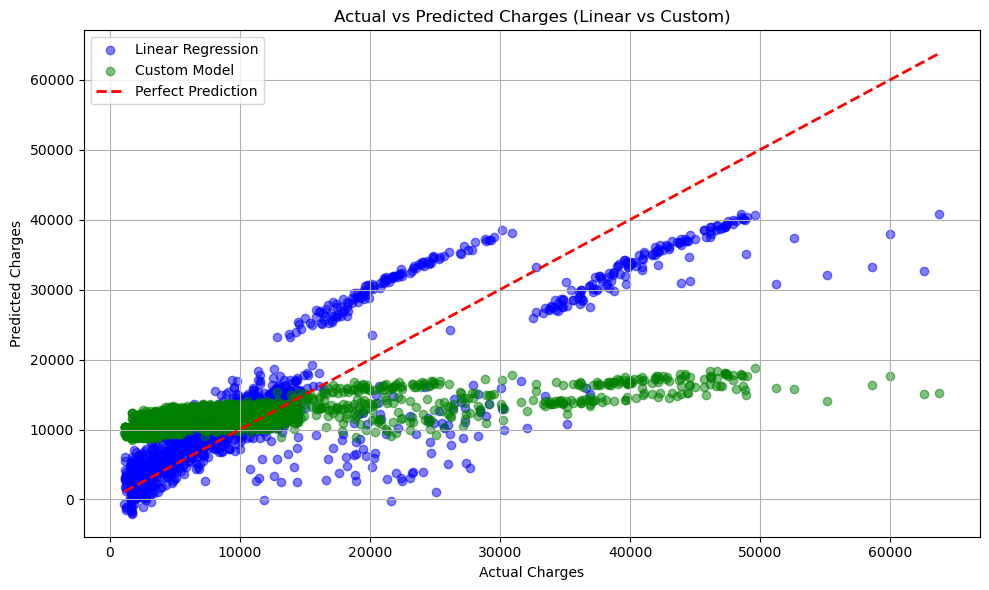

In [129]:
'''

NOT ORGINAL CODE!!!!
NOT ORGINAL CODE!!!!
NOT ORGINAL CODE!!!!

Allows for a scatter plot

'''

# Apply your custom charges_calc() function to each row
df['custom_predicted_charges'] = df.apply(
    lambda row: charges_calc(row['age'], row['sex'], row['bmi'], row['children'], row['smoker'], row['region']),
    axis=1
)


import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

plt.scatter(df_encoded['charges'], df_encoded['predicted_charges'], alpha=0.5, color='blue', label='Linear Regression')
plt.scatter(df['charges'], df['custom_predicted_charges'], alpha=0.5, color='green', label='Custom Model')
plt.plot([df['charges'].min(), df['charges'].max()],
         [df['charges'].min(), df['charges'].max()],
         'r--', label='Perfect Prediction', linewidth=2)


plt.title('Actual vs Predicted Charges (Linear vs Custom)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



The red line is the perfect prediction line.

Blue dots show how close the predictions from the linear regression model are to the actual data.

Green dots represent my own predictions.

It seems that the linear regression does a better job at predicting insurance costs, although both models still need a lot of fine-tuning, as even the regression line falls short of being accurate enough for reliable estimation.

